In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model

from tensorflow.keras.callbacks import TensorBoard


# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [3]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [5]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP

In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

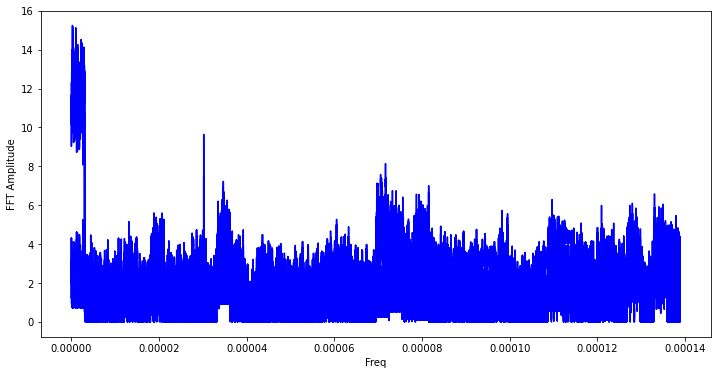

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [14]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

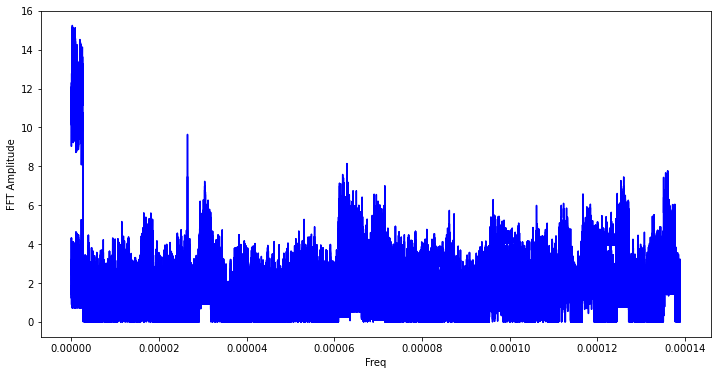

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [16]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [17]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])

In [18]:
X_Norm['Time ']=Normal_DPx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,10.949224,9.380308,-0.025825,-0.025825,9.380308,0.000000
1,10.869041,9.445177,-0.050602,-0.050602,9.445177,0.000098
2,10.893730,9.425203,-0.042973,-0.042973,9.425203,0.000195
3,10.478212,9.761365,-0.171375,-0.171375,9.761365,0.000293
4,10.967740,9.365328,-0.020103,-0.020103,9.365328,0.000391
...,...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629,89.843262
919996,-0.651565,0.785215,0.639496,0.639496,0.785215,89.843359
919997,-1.122577,1.166271,0.493945,0.493945,1.166271,89.843457
919998,-0.906607,0.991548,0.560684,0.560684,0.991548,89.843555


In [19]:
X_cav['Time ']=Cavitation_DPx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391
...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805


In [20]:
X_train=X_Norm

In [21]:
X_train=X_train.drop(columns=['Time '])

In [22]:
X_train

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,10.949224,9.380308,-0.025825,-0.025825,9.380308
1,10.869041,9.445177,-0.050602,-0.050602,9.445177
2,10.893730,9.425203,-0.042973,-0.042973,9.425203
3,10.478212,9.761365,-0.171375,-0.171375,9.761365
4,10.967740,9.365328,-0.020103,-0.020103,9.365328
...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629
919996,-0.651565,0.785215,0.639496,0.639496,0.785215
919997,-1.122577,1.166271,0.493945,0.493945,1.166271
919998,-0.906607,0.991548,0.560684,0.560684,0.991548


In [23]:
X_train=np.array(X_train)


In [24]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [25]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [36]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(5, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(5, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(5, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(5, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [37]:
X_test=X_cav

In [38]:
X_test=X_test.drop(columns=['Time '])

In [39]:
X_test.shape

(1048576, 5)

In [40]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 59s 29ms/step - loss: 0.5539 - val_loss: 0.4850
Epoch 2/150
1797/1797 [==============================] - 55s 31ms/step - loss: 0.2298 - val_loss: 0.1585
Epoch 3/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.1030 - val_loss: 0.1230
Epoch 4/150
1797/1797 [==============================] - 60s 33ms/step - loss: 0.0940 - val_loss: 0.1563
Epoch 5/150
1797/1797 [==============================] - 62s 34ms/step - loss: 0.0887 - val_loss: 0.1493
Epoch 6/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0852 - val_loss: 0.1323
Epoch 7/150
1797/1797 [==============================] - 61s 34ms/step - loss: 0.0840 - val_loss: 0.1413
Epoch 8/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0820 - val_loss: 0.1198
Epoch 9/150
1797/1797 [==============================] - 59s 33ms/step - loss: 0.0800 - val_loss: 0.1114
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 58s 32ms/step - loss: 0.0481 - val_loss: 0.1112
Epoch 79/150
1797/1797 [==============================] - 58s 32ms/step - loss: 0.0482 - val_loss: 0.0960
Epoch 80/150
1797/1797 [==============================] - 55s 31ms/step - loss: 0.0482 - val_loss: 0.1045
Epoch 81/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0462 - val_loss: 0.1039
Epoch 82/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0477 - val_loss: 0.1176
Epoch 83/150
1797/1797 [==============================] - 52s 29ms/step - loss: 0.0466 - val_loss: 0.1003
Epoch 84/150
1797/1797 [==============================] - 49s 27ms/step - loss: 0.0475 - val_loss: 0.1032
Epoch 85/150
1797/1797 [==============================] - 49s 27ms/step - loss: 0.0466 - val_loss: 0.1013
Epoch 86/150
1797/1797 [==============================] - 49s 27ms/step - loss: 0.0469 - val_loss: 0.1114
Epoch 87/150
1797/1797 [==============================] - 4

In [41]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 94s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

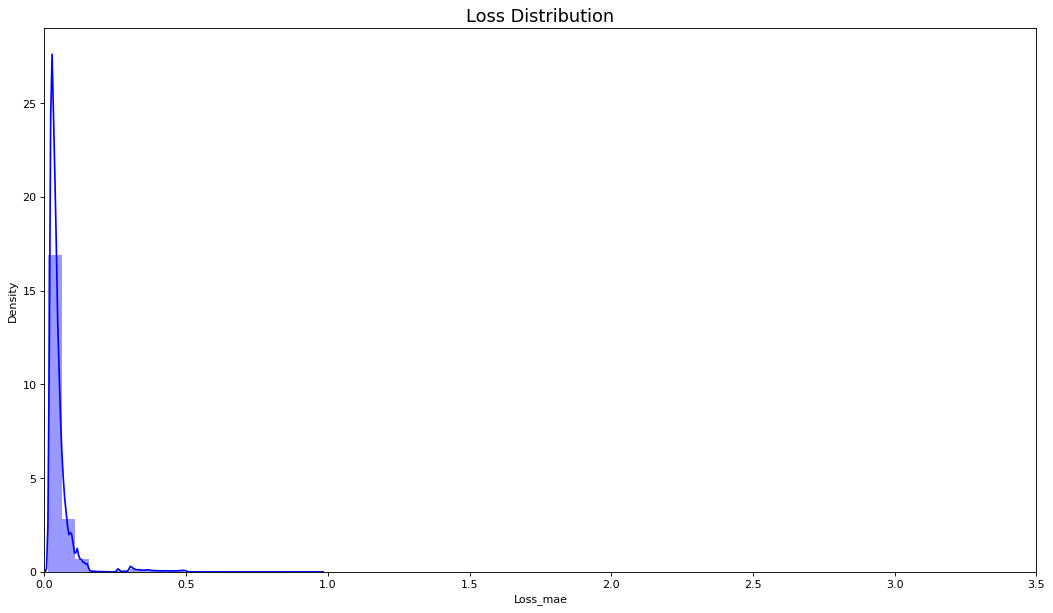

In [42]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [43]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 113s 3ms/step


In [44]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

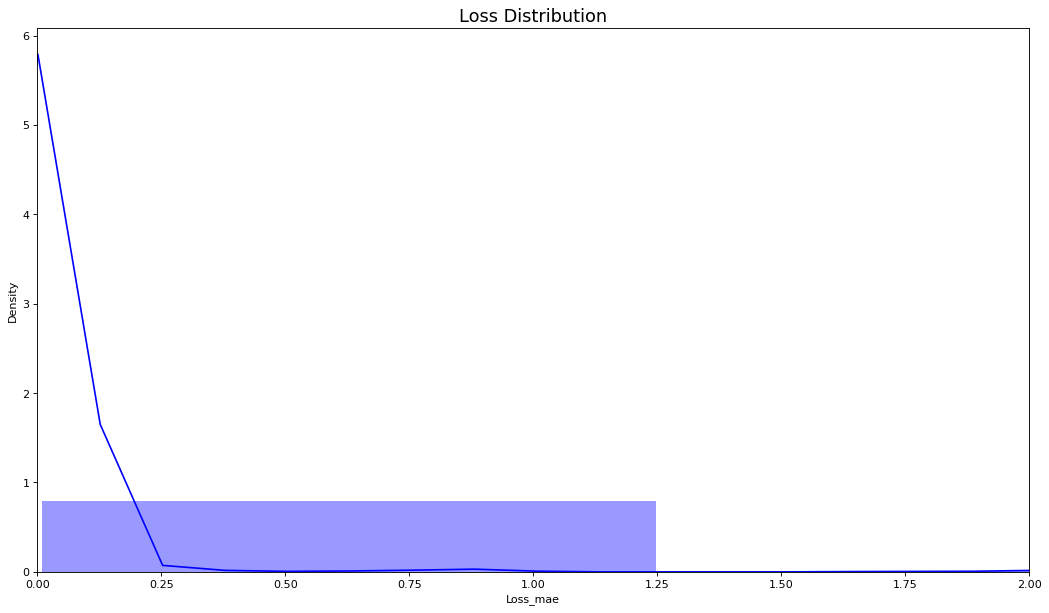

In [45]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

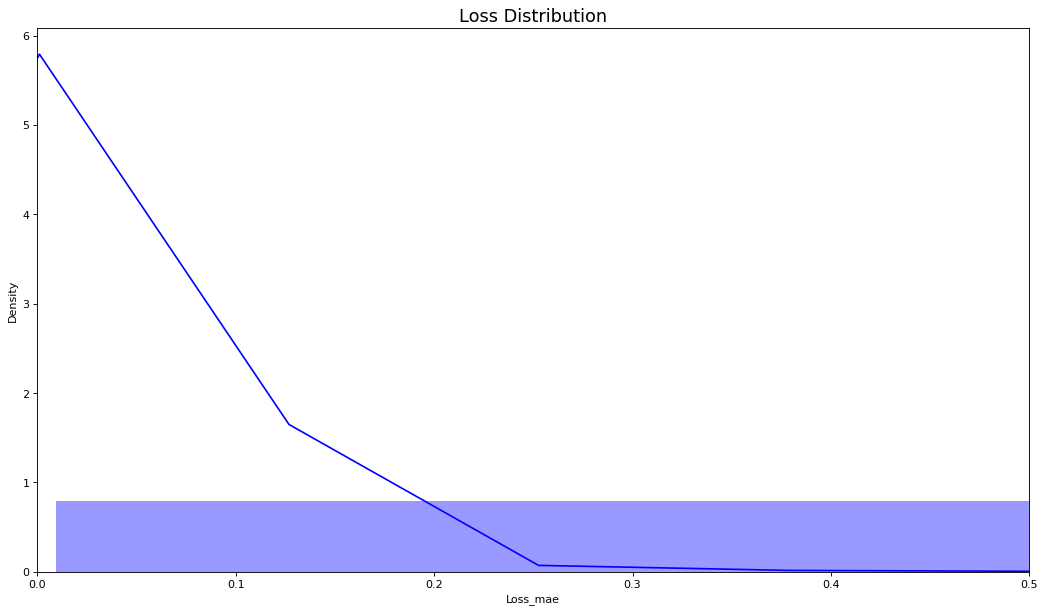

In [47]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0,0.5])

In [48]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.4

In [49]:
test_mae_loss.shape

(1048576, 1)

In [50]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


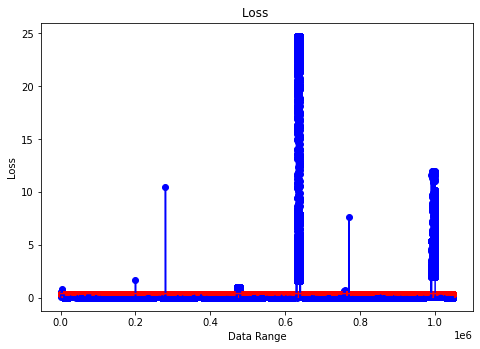

In [51]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [52]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000,0.034331,0.4,False
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.310609,0.4,False
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.308471,0.4,False
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.301628,0.4,False
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.286376,0.4,False
...,...,...,...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512,0.032825,0.4,False
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609,0.028320,0.4,False
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707,0.030971,0.4,False
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805,0.032213,0.4,False


In [53]:
test_score_df["anomaly"][1]

False

In [54]:
anomalies=test_score_df


In [55]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
500,8.275507,-0.638748,0.165875,0.165875,-0.638748,0.048828,0.408320,0.4,True
502,8.543296,-0.855394,0.248626,0.248626,-0.855394,0.049023,0.467157,0.4,True
504,8.257148,-0.623896,0.160202,0.160202,-0.623896,0.049219,0.404603,0.4,True
505,8.393681,-0.734353,0.202392,0.202392,-0.734353,0.049316,0.433285,0.4,True
507,8.771693,-1.040171,0.319205,0.319205,-1.040171,0.049512,0.523370,0.4,True
...,...,...,...,...,...,...,...,...,...
999995,-10.668763,-7.098123,0.068420,0.068420,-7.098123,97.655762,2.696008,0.4,True
999996,-10.025564,-7.618482,0.267179,0.267179,-7.618482,97.655859,3.015865,0.4,True
999997,-10.823654,-6.972813,0.020556,0.020556,-6.972813,97.655957,2.654075,0.4,True
999998,-10.311711,-7.386984,0.178755,0.178755,-7.386984,97.656055,2.765011,0.4,True


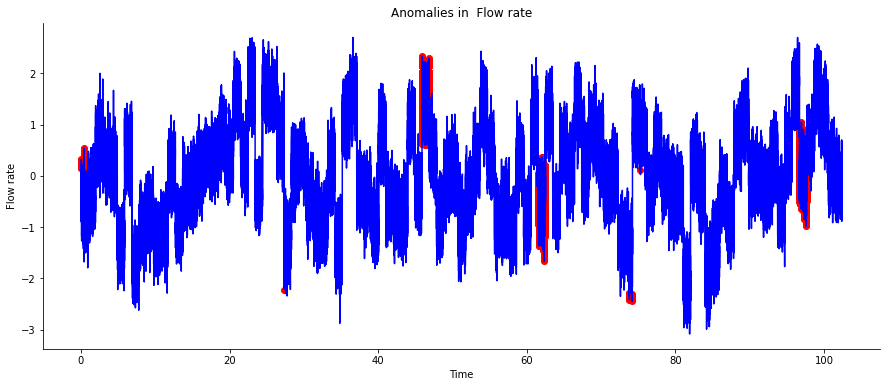

In [56]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

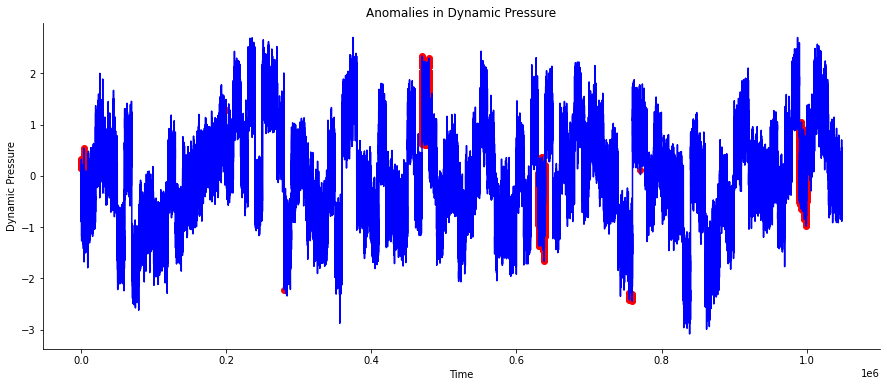

In [57]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

In [58]:
model.save("LSTM02_DP_frequency")


INFO:tensorflow:Assets written to: LSTM02_DP_frequency\assets


# Vibration

In [59]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")

In [60]:
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [61]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [62]:
Normal_Vibx

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [63]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [64]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [65]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [66]:
Cavitation_Vibx

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [67]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [68]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [69]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [70]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [71]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

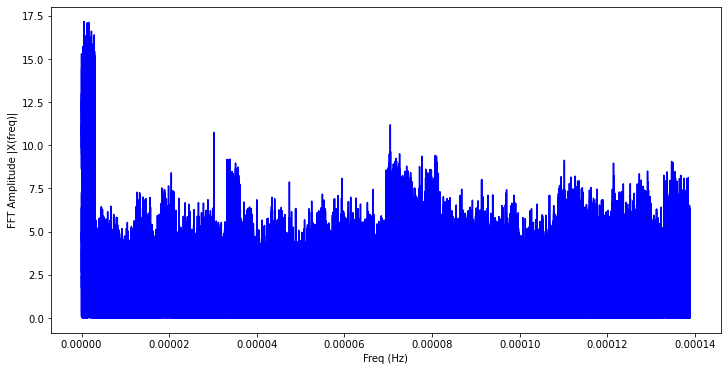

In [72]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [73]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

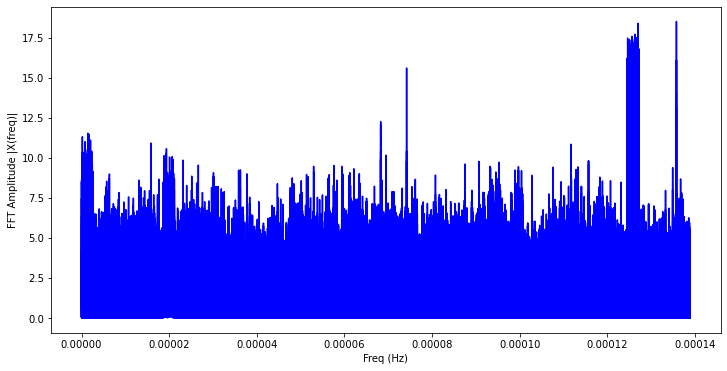

In [74]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_cav[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [75]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [76]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [77]:
X_Norm['Time ']=Normal_Vibx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866,0.000000
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993,0.000098
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361,0.000195
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410,0.000293
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047,0.000391
...,...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512,89.843262
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837,89.843359
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768,89.843457
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567,89.843555


In [78]:
X_cav['Time ']=Cavitation_Vibx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391
...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805


In [79]:
X_train=X_Norm

In [80]:
X_train=X_train.drop(columns=['Time '])

In [81]:
X_train=np.array(X_train)


In [82]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [83]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [84]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(6, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(6, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(6, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(6, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [85]:
X_test=X_cav

In [86]:
X_test=X_test.drop(columns=['Time '])

In [87]:
X_test.shape

(1048576, 6)

In [88]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 90s 46ms/step - loss: 0.6057 - val_loss: 0.4131
Epoch 2/150
1797/1797 [==============================] - 81s 45ms/step - loss: 0.1619 - val_loss: 0.2023
Epoch 3/150
1797/1797 [==============================] - 87s 48ms/step - loss: 0.1361 - val_loss: 0.2642
Epoch 4/150
1797/1797 [==============================] - 86s 48ms/step - loss: 0.1280 - val_loss: 0.1902
Epoch 5/150
1797/1797 [==============================] - 87s 49ms/step - loss: 0.1235 - val_loss: 0.1324
Epoch 6/150
1797/1797 [==============================] - 91s 51ms/step - loss: 0.1192 - val_loss: 0.1399
Epoch 7/150
1797/1797 [==============================] - 88s 49ms/step - loss: 0.1174 - val_loss: 0.1722
Epoch 8/150
1797/1797 [==============================] - 87s 48ms/step - loss: 0.1146 - val_loss: 0.1603
Epoch 9/150
1797/1797 [==============================] - 88s 49ms/step - loss: 0.1109 - val_loss: 0.1561
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 80s 45ms/step - loss: 0.0641 - val_loss: 0.1406
Epoch 79/150
1797/1797 [==============================] - 80s 44ms/step - loss: 0.0643 - val_loss: 0.1310
Epoch 80/150
1797/1797 [==============================] - 102s 57ms/step - loss: 0.0624 - val_loss: 0.1377
Epoch 81/150
1797/1797 [==============================] - 116s 64ms/step - loss: 0.0631 - val_loss: 0.1078
Epoch 82/150
1797/1797 [==============================] - 114s 64ms/step - loss: 0.0629 - val_loss: 0.1247
Epoch 83/150
1797/1797 [==============================] - 112s 63ms/step - loss: 0.0626 - val_loss: 0.1216
Epoch 84/150
1797/1797 [==============================] - 116s 64ms/step - loss: 0.0619 - val_loss: 0.1362
Epoch 85/150
1797/1797 [==============================] - 118s 66ms/step - loss: 0.0615 - val_loss: 0.1500
Epoch 86/150
1797/1797 [==============================] - 114s 63ms/step - loss: 0.0625 - val_loss: 0.1435
Epoch 87/150
1797/1797 [============================

In [89]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 99s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.5)

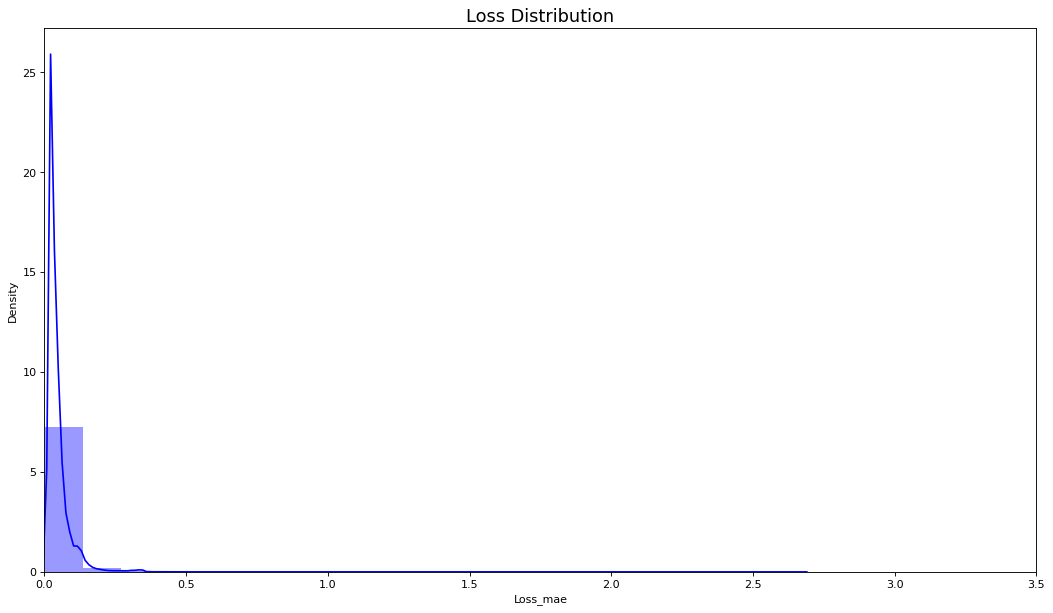

In [90]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [91]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 146s 4ms/step


In [92]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 3.0)

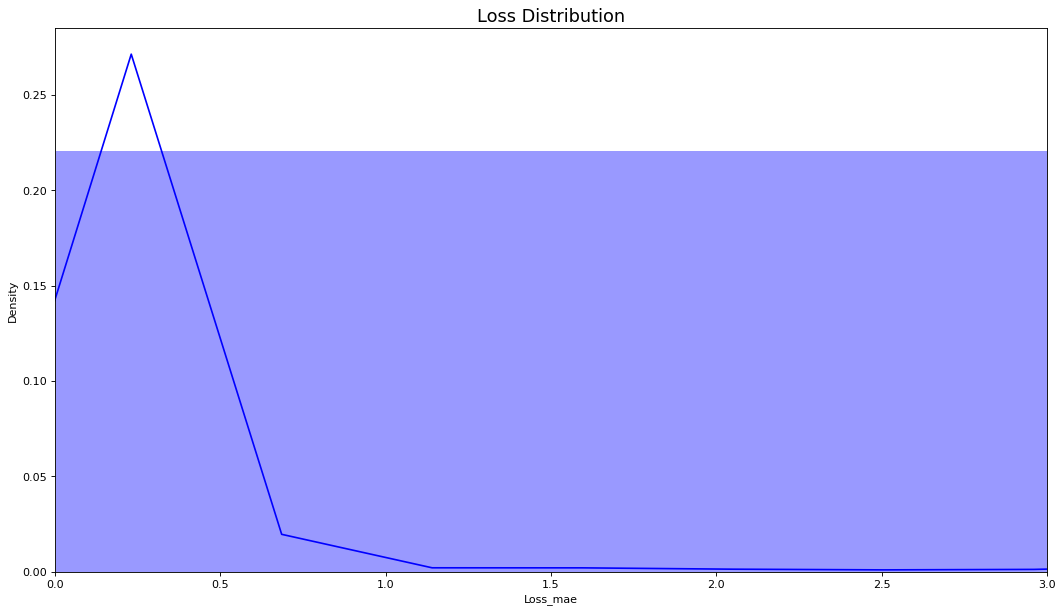

In [93]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,3.0])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

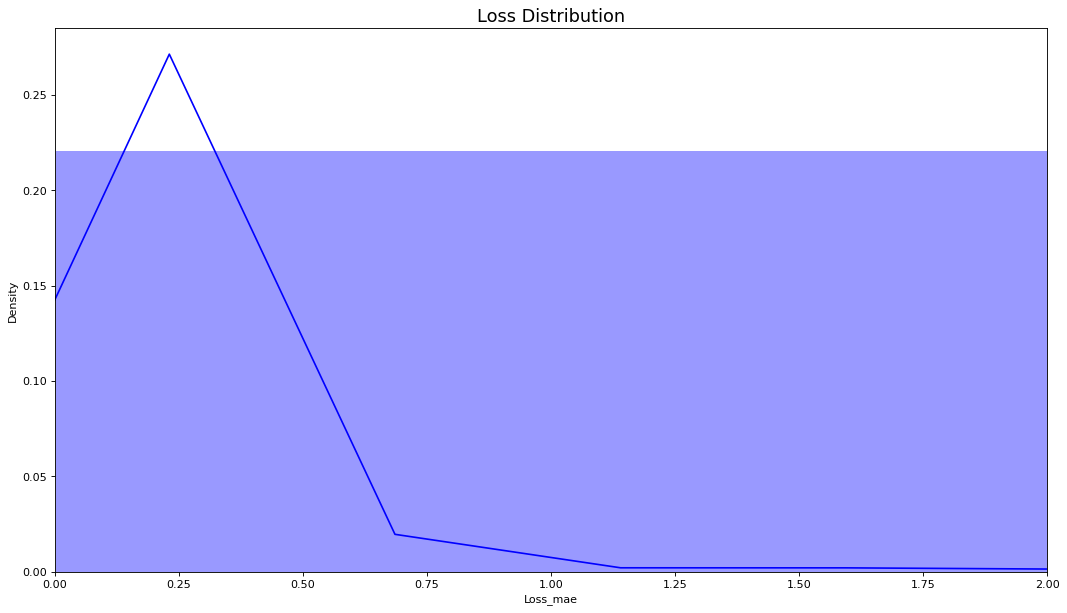

In [95]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0,2])

In [96]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=1.25

In [97]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


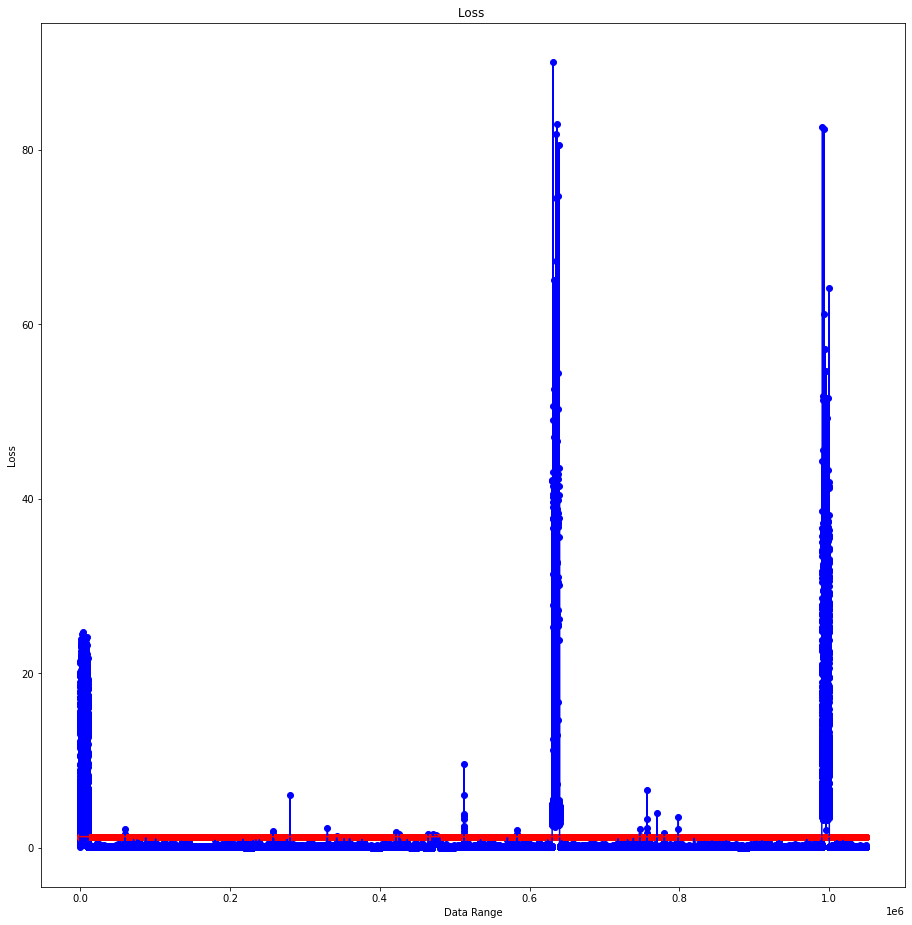

In [98]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [99]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000,0.029489,1.25,False
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098,11.462729,1.25,True
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195,1.431327,1.25,True
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293,1.427097,1.25,True
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391,17.182478,1.25,True
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512,0.026560,1.25,False
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609,0.018601,1.25,False
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707,0.016304,1.25,False
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805,0.033224,1.25,False


In [100]:
test_score_df["anomaly"][1]

True

In [101]:
anomalies=test_score_df


In [102]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098,11.462729,1.25,True
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195,1.431327,1.25,True
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293,1.427097,1.25,True
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391,17.182478,1.25,True
7,5.639489,2.242980,-0.077390,-1.174958,-0.077390,2.242980,0.000684,13.264913,1.25,True
...,...,...,...,...,...,...,...,...,...,...
999995,-10.563621,-7.574162,-4.023697,4.085535,-4.023697,-7.574162,97.655762,4.603756,1.25,True
999996,-11.829007,-6.804010,-3.803379,3.369981,-3.803379,-6.804010,97.655859,4.505094,1.25,True
999997,-13.487304,-6.046403,-2.759607,1.425520,-2.759607,-6.046403,97.655957,4.147179,1.25,True
999998,-11.981505,-7.325972,-1.932497,0.824640,-1.932497,-7.325972,97.656055,3.984389,1.25,True


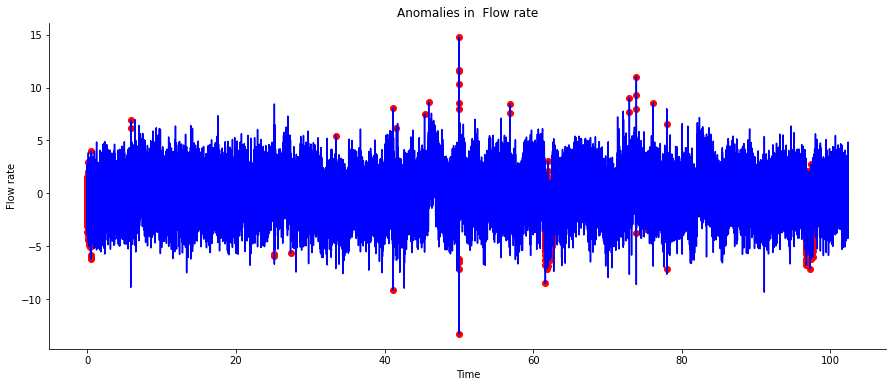

In [103]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

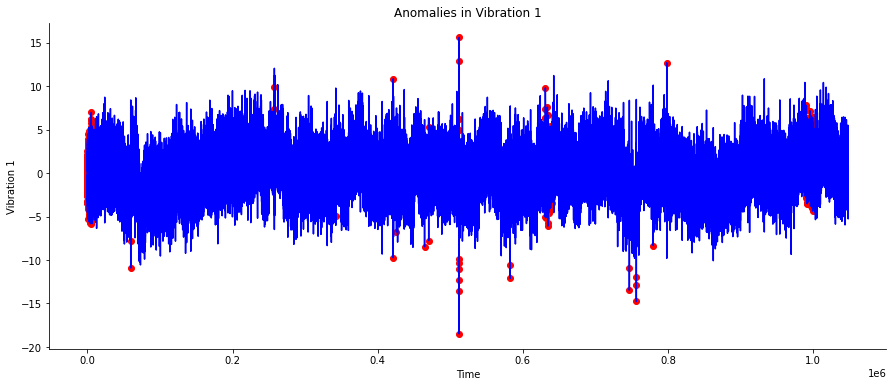

In [104]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

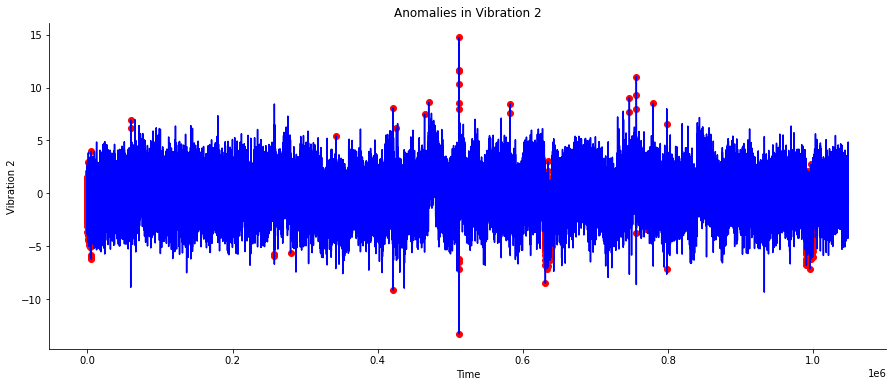

In [105]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies.index, anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

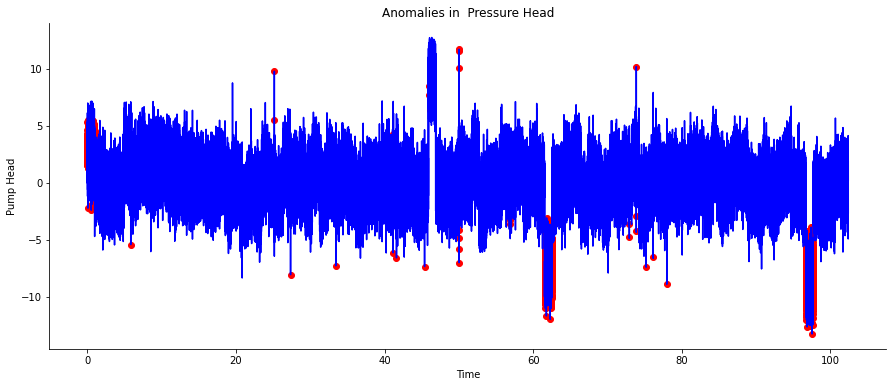

In [106]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pump Head")

plt.show()

In [107]:
model.save("LSTM02_Vib_frequency")


INFO:tensorflow:Assets written to: LSTM02_Vib_frequency\assets


INFO:tensorflow:Assets written to: LSTM02_Vib_frequency\assets
